In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt



# Loading California House Pricing Dataset

In [8]:
#Creating a filepath for dataset
file_path =r"E:\Machine Learning Projects\Linear Regression Case Study\datasets\housing.csv"
output = r"E:\Machine Learning Projects\Linear Regression Case Study\Visualizations"
#Reading the Dataset
data = pd.read_csv(file_path)
#Displaying it
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
data.columns # displaying columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [10]:
data.head(10) # displaying first 10 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [11]:
#Data Exploration
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Missing Data Values

In [12]:
#check for missing values
missing_values = data.isnull().sum()

#Checking the percentage of missing values in each column
missing_percentage = (missing_values / len(data))*100

#displaying the Calculations
print("Missing values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing values in Each Column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of Missing Data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [13]:
#Remove Rows with Missing values
data_cleaned = data.dropna()
#Verify that Missing Values have been Removed
print("Missing Values in Each column after removal:\n")
print(data_cleaned.isnull().sum())


Missing Values in Each column after removal:

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# Data Exploration and Visualization

In [14]:
#Statistical description of data
data.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


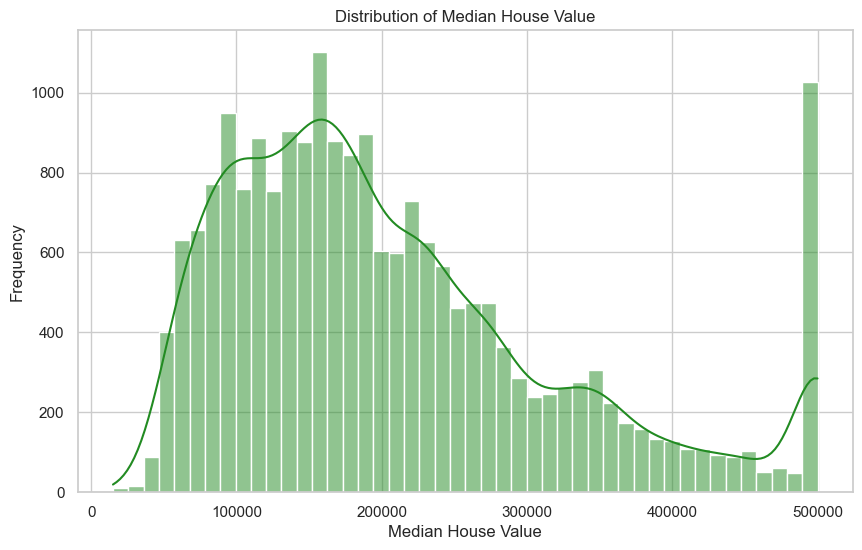

In [15]:
# Visualization
sns.set(style = "whitegrid")
plt.figure(figsize = (10,6))
sns.histplot(data_cleaned['median_house_value'], color = 'forestgreen' , kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.savefig(f"{output}/Distribution of Median House Value.jpg",format='jpg', dpi=300 ,bbox_inches='tight')
plt.show()


In [16]:
#Assuming 'data' is your DataFrame and 'median_house_value' is column of interest
Q1 = data_cleaned['median_house_value'].quantile(0.25)
print('25% percentile: ')
print(Q1)
Q3 = data_cleaned['median_house_value'].quantile(0.75)
print('75% percentile: ')
print(Q3)
IQR = Q3 - Q1
print('Inter Quartile Range: ')
print(IQR)


#Define the bound for the outliers
lower_bound = Q1 - 1.5 *  IQR
upper_bound = Q3 + 1.5 *  IQR

#Remove outliers
data_outliers_1 = data_cleaned[(data_cleaned['median_house_value'] >= lower_bound) & (data_cleaned['median_house_value'] <= upper_bound)]

#Check the shape of the data before and after removal of outliers
print("Shape of data before removing outliers:", data.shape)
print("Shape of data after removing outliers:", data_cleaned.shape)


25% percentile: 
119500.0
75% percentile: 
264700.0
Inter Quartile Range: 
145200.0
Shape of data before removing outliers: (20640, 10)
Shape of data after removing outliers: (20433, 10)


# BoxPlot for Outlier Detection

## Outliers in Median Income

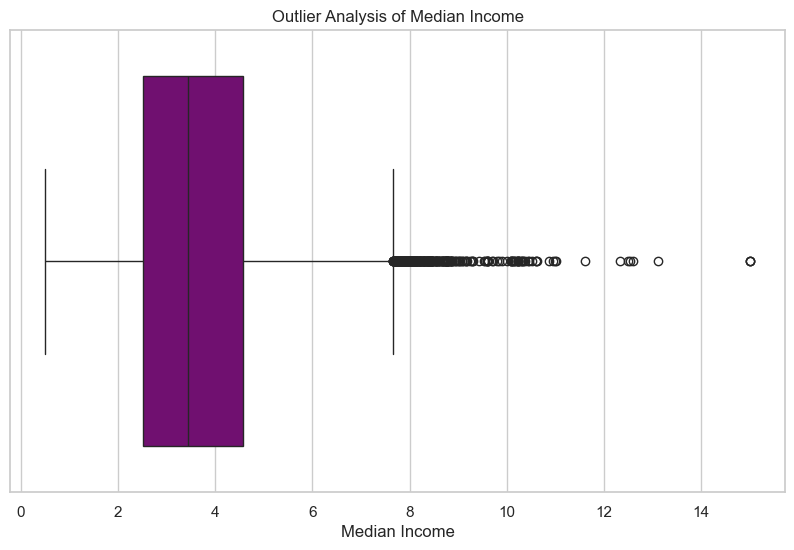

In [17]:
#Checking boxplot for outliers detection
plt.figure(figsize=(10,6))
sns.boxplot(x=data_outliers_1['median_income'], color='purple')
plt.title('Outlier Analysis of Median Income')
plt.xlabel('Median Income')

#Save the boxplot to a file
plt.savefig(f"{output}/Outlier Analysis of Median Income.jpg",format='jpg', dpi=300, bbox_inches='tight')
plt.show()


In [18]:
#Calculating Q1 and Q3
Q1 = data_outliers_1['median_house_value'].quantile(0.25)
print('25% percentile: ')
print(Q1)
Q3 = data_outliers_1['median_house_value'].quantile(0.75)
print('75% percentile: ')
print(Q3)
IQR = Q3 - Q1
print('Inter Quartile Range: ')
print(IQR)

#Define the bound for the outliers
lower_bound = Q1 - 1.5 *  IQR
upper_bound = Q3 + 1.5 *  IQR

#Remove outliers
data_outliers_2 = data_outliers_1[(data_outliers_1['median_house_value'] >= lower_bound) & (data_outliers_1['median_house_value'] <= upper_bound)]

#Check the shape of the data before and after removal of outliers
print("Shape of data before removing outliers:", data_outliers_1.shape)
print("Shape of data after removing outliers:", data_outliers_2.shape)



25% percentile: 
116100.0
75% percentile: 
246400.0
Inter Quartile Range: 
130300.0
Shape of data before removing outliers: (19369, 10)
Shape of data after removing outliers: (19095, 10)


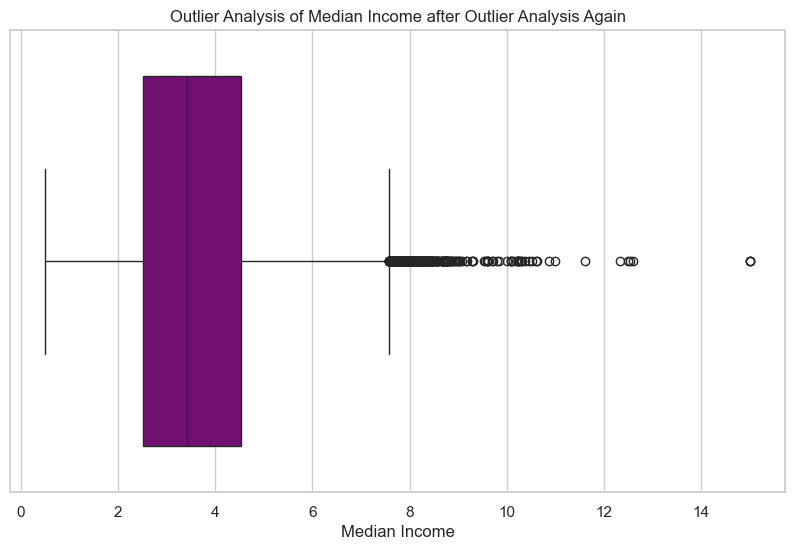

In [19]:
#Again checking boxplot for outliers detection
plt.figure(figsize=(10,6))
sns.boxplot(x=data_outliers_2['median_income'], color='purple')
plt.title('Outlier Analysis of Median Income after Outlier Analysis Again')
plt.xlabel('Median Income')

#Save the boxplot to a file
plt.savefig(f"{output}/Outlier Analysis of Median Income after Outlier Analysis Again.jpg",format='jpg', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
data = data_outliers_2

# Correlaton HeatMap

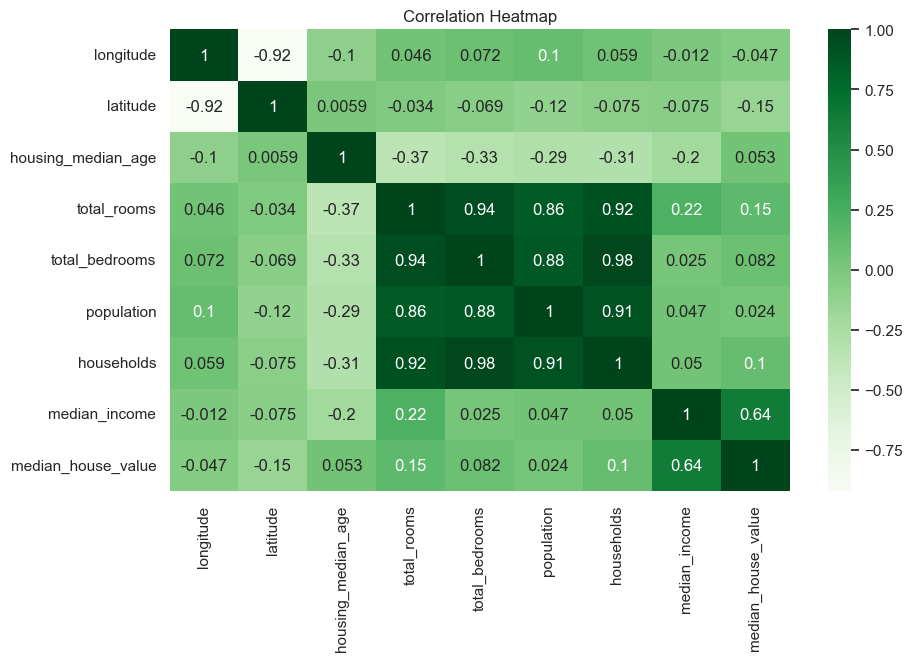

In [21]:
plt.figure(figsize=(10,6))
# Calculate the correlation matrix for numerical features only
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap')

plt.savefig(f"{output}/Correlation Heatmap.jpg",format='jpg', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
#dropping the highest correlated independent variable total_bedrooms
data = data.drop('total_bedrooms', axis=1)  #Already dropped so running the code again will cause error
data.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

Here we have an independent variable named ocean_proximity which has string value:
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND'].

we need to tackle that before moving onto causal analysis with linear regression.

There are multiple ways of handling this on the web
but the better way is to transform it into string categorical variables...Dummy Variables.

Dummy Variable Means that it takes two possible values
0 or 1 in this case Binary Values.
1 means the condition is Satisfied while 0 means condition is not satisfied.


In [23]:
#unique Value count foe categorical data
for column in ['ocean_proximity']:
  print(f"Unique Values in {column}: ", data[column].unique())

Unique Values in ocean_proximity:  ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


# String Data Categorization

In [24]:
# Check if 'ocean_proximity' exists before proceeding
if 'ocean_proximity' in data.columns:
  # Generate dummy variables
  ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity')
  data = pd.concat([data.drop("ocean_proximity", axis = 1), ocean_proximity_dummies], axis = 1).astype(int)
else:
  print("Column 'ocean_proximity' not found in the DataFrame.")

ocean_proximity_dummies.astype(int)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [25]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [26]:
data = data.drop('ocean_proximity_ISLAND', axis=1)
data = data.drop('total_rooms', axis =1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'population',
       'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [27]:
data.head(10)

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1,-122,37,21,2401,1138,8,358500,0,0,1,0
2,-122,37,52,496,177,7,352100,0,0,1,0
3,-122,37,52,558,219,5,341300,0,0,1,0
4,-122,37,52,565,259,3,342200,0,0,1,0
5,-122,37,52,413,193,4,269700,0,0,1,0
6,-122,37,52,1094,514,3,299200,0,0,1,0
7,-122,37,52,1157,647,3,241400,0,0,1,0
8,-122,37,42,1206,595,2,226700,0,0,1,0
9,-122,37,52,1551,714,3,261100,0,0,1,0
10,-122,37,52,910,402,3,281500,0,0,1,0


# Splitting the Test and Train data

In [28]:
#Define your Features[Independent Variables] and Target[Dependent Variable]
features = ['longitude', 'latitude', 'housing_median_age',
       'households', 'median_income','population',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = ['median_house_value']

X = data[features]
y = data[target]

#Split the dat into testing and training set
#testing size determines the proportion of the data to be included in the test split
#random _state determines the reproducibility of your split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1111)

#Checking the size of the split
print(f"Training test size: {X_train.shape[0]} samples")
print(f"Testing test size: {X_test.shape[0]} samples")

Training test size: 15276 samples
Testing test size: 3819 samples


# Training

In [29]:
#Adding a constant to the predictor because statesmodel's OLS doesnt include it by defualt
X_train_const = sm.add_constant(X_train)

#fitting the model
model_fitted  = sm.OLS(y_train, X_train_const).fit()

#printing the Summary
print(model_fitted.summary())


                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     2176.
Date:                Fri, 27 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:02:12   Log-Likelihood:            -1.8929e+05
No. Observations:               15276   AIC:                         3.786e+05
Df Residuals:                   15265   BIC:                         3.787e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Prediction/Testing

In [30]:
#adding a constant to test predictors
X_test_const = sm.add_constant(X_test)

#making predictions
test_predictions = model_fitted.predict(X_test_const)
test_predictions

4291     160898.480897
8496     222082.541839
2280     104695.253297
5696     302299.453160
2466      87567.507487
             ...      
17093    197518.283825
19201    195384.517361
11002    270904.502147
4612     128634.939445
19262    194086.063831
Length: 3819, dtype: float64

# Checking OLS Assumptions

## Assumption#1: Linearty

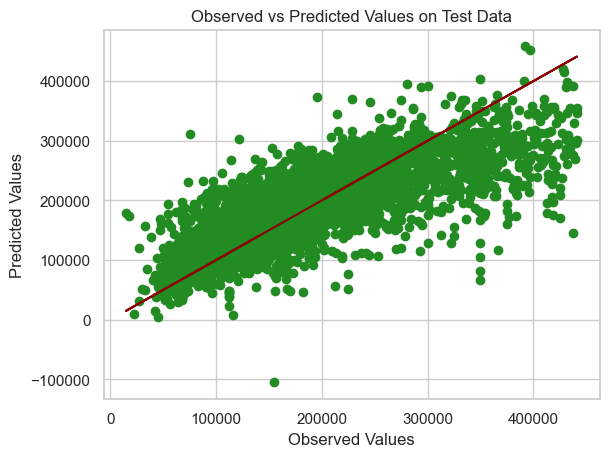

In [31]:
#Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color='forestgreen')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test,y_test,color='darkred') #line for True Data

plt.savefig(f"{output}/Observed vs Predicted Values on Test Data-Checking Linearty.jpg",format='jpg', dpi=300, bbox_inches='tight')
plt.show()

**Positive Linear Relationship:** the red line(which represents perfect prediction line) and the distribution of datapoints suggest that there's postive linear relationship between observed and predicted values.This means if the Actual Values increase, the predicted ones will also increase.

Which is a good sign for linearty

## Assumption#2 : Random Sample

In [32]:
mean_residuals = np.mean(model_fitted.resid)
print(f"the Mean of residuals is: {np.round(mean_residuals,2)}")

the Mean of residuals is: 0.0


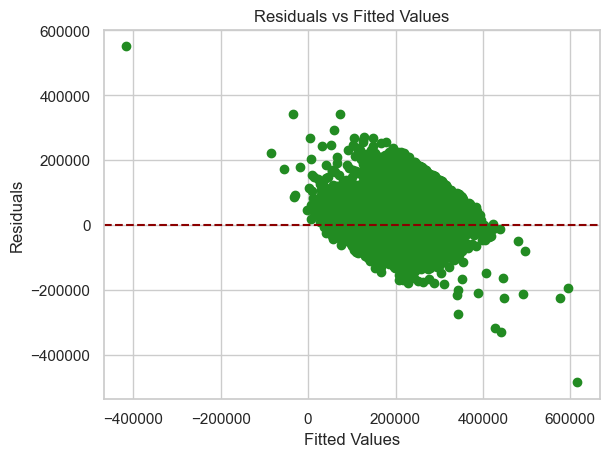

In [33]:
#PLotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color='forestgreen')
plt.axhline(y=0, color='darkred', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

plt.savefig(f"{output}/Residuals vs Fitted Values-Checking Random Sample.jpg",format='jpg', dpi=300, bbox_inches='tight')
plt.show()

in this plot we dont see any discernble patterns. tthe residuals are thus randomly distributed among the horizontal line at 0 with no clear shape or trend.
if there's a pattern or the residuals show a systematics deviation from zero then it could suggest issues such as model misspecifications, non-linearty or ommited-variable bias

## Assumption 3: Exogeneity

In [34]:
#Calculate the residuals
residuals = model_fitted.resid

#check for correlation between residuals and predictor
for column in X_train.columns:
  corr_coefficent = np.corrcoef(X_train[column], residuals)[0,1]
  print(f"Correlation between residuals and {column} : {np.round(corr_coefficent,2)}")


Correlation between residuals and longitude : 0.0
Correlation between residuals and latitude : -0.0
Correlation between residuals and housing_median_age : -0.0
Correlation between residuals and households : 0.0
Correlation between residuals and median_income : 0.0
Correlation between residuals and population : 0.0
Correlation between residuals and ocean_proximity_<1H OCEAN : -0.0
Correlation between residuals and ocean_proximity_INLAND : 0.0
Correlation between residuals and ocean_proximity_NEAR BAY : -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN : -0.0


## Assumption 4 : Homoskedasticity

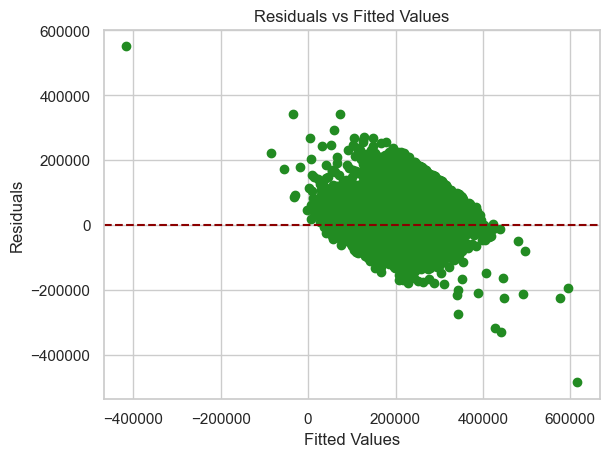

In [35]:
#Plotting the Residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color='forestgreen')
plt.axhline(y=0, color='darkred', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

plt.savefig(f"{output}/Residuals vs Fitted Values-Checking Homoskedasticity.jpg",format='jpg', dpi=300, bbox_inches='tight')
plt.show()

**Random Scatter :** if the plot shows random scatter of residuals around the horizontal line at zero , it supports the homoescedasticity assumption.

# Training/Test/Evaluation with ScikitLearn

## Scaling the data

In [36]:
#Initialize the Standard Scaler
scaler = StandardScaler()

#Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

#Transform the test data
X_test_scaled = scaler.transform(X_test)

In [37]:
#Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

#Make predictions on the test set
y_pred = lr.predict(X_test_scaled)

#Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 3163200013.3793244
Root Mean Squared Error (RMSE): 56242.33292973651


---

### Polynomial Regression with Standard Scaling

This approach applies polynomial features and standard scaling to the dataset, followed by training a linear regression model.

1. **Initialize Preprocessing Tools**:
   - **StandardScaler**: Scales the features to have a mean of 0 and a standard deviation of 1.
   - **PolynomialFeatures**: Generates polynomial features up to a specified degree to allow the model to capture non-linear relationships.

```python
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Standard Scaler and PolynomialFeatures
scaler = StandardScaler()
poly = PolynomialFeatures(degree=3, include_bias=False)
```

2. **Fit and Transform the Training Data**:
   - First, we apply **StandardScaler** to normalize the features in the training data.
   - Then, **PolynomialFeatures** is applied to generate polynomial features for the training data.

```python
# Fit and transform the training data for scaling
X_train_scaled = scaler.fit_transform(X_train)

# Apply PolynomialFeatures to the training data
X_train_poly = poly.fit_transform(X_train_scaled)
```

3. **Transform the Test Data**:
   - After fitting the scaler on the training data, we use the same transformation to scale the test data.
   - The same polynomial transformation is applied to the test data.

```python
# Transform the test data for scaling
X_test_scaled = scaler.transform(X_test)

# Apply PolynomialFeatures to the test data
X_test_poly = poly.transform(X_test_scaled)
```

4. **Train the Model**:
   - A **LinearRegression** model is created and fitted to the transformed training data (polynomial features).

```python
# Create and fit the model using Polynomial features
lr = LinearRegression()
lr.fit(X_train_poly, y_train)
```

5. **Make Predictions**:
   - Predictions are made on the test set using the trained model.

```python
# Make predictions on the test set
y_pred_poly = lr.predict(X_test_poly)
```

6. **Evaluate Model Performance**:
   - The **Mean Squared Error (MSE)** and **Root Mean Squared Error (RMSE)** are calculated to evaluate the model’s performance.

```python
# Calculate MSE and RMSE
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

print(f"Polynomial Features Mean Squared Error (MSE): {mse_poly}")
print(f"Polynomial Features Root Mean Squared Error (RMSE): {rmse_poly}")
```

---

### Explanation:
- **StandardScaler** normalizes the data to ensure that all features have the same scale, which is important for polynomial features, as they can increase the scale of values significantly.
- **PolynomialFeatures** expands the feature set by generating polynomial terms, which enables the model to capture more complex relationships between features.
- **LinearRegression** is then trained on these expanded features, and the performance is evaluated using MSE and RMSE.

---

In [38]:
from sklearn.preprocessing import PolynomialFeatures

# Initialize the Standard Scaler and PolynomialFeatures
scaler = StandardScaler()
poly = PolynomialFeatures(degree=3, include_bias=False)

# Fit and transform the training data for scaling
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data for scaling
X_test_scaled = scaler.transform(X_test)

# Apply PolynomialFeatures to both the training and test data
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Create and fit the model using Polynomial features
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred_poly = lr.predict(X_test_poly)

# Calculate MSE and RMSE
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

print(f"Polynomial Features Mean Squared Error (MSE): {mse_poly}")
print(f"Polynomial Features Root Mean Squared Error (RMSE): {rmse_poly}")



Polynomial Features Mean Squared Error (MSE): 2402131680.7454815
Polynomial Features Root Mean Squared Error (RMSE): 49011.54640230689



---

### R-squared Calculation for Polynomial Features

After fitting a linear regression model with polynomial features, we can evaluate how well the model fits the training and test data using **R-squared** (also known as the coefficient of determination). R-squared provides a measure of how well the model explains the variance of the target variable.

1. **Import R-squared Metric**:
   - Import `r2_score` from `sklearn.metrics` to calculate R-squared.

```python
from sklearn.metrics import r2_score
```

2. **Calculate R-squared**:
   - Calculate **R-squared** for both the training and test data by comparing the actual target values (`y_train`, `y_test`) with the predicted values from the model.
   - Use the **polynomial transformed features** (`X_train_poly`, `X_test_poly`) as inputs to the model.

```python
# Calculate R-squared using the polynomial features for prediction
train_r2 = r2_score(y_train, lr.predict(X_train_poly)) # Changed X_train to X_train_poly
test_r2 = r2_score(y_test, lr.predict(X_test_poly)) # Changed X_test to X_test_poly

print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")
```

---

### Explanation:
- **R-squared** measures the proportion of variance in the target variable that is explained by the model. A higher R-squared indicates a better fit.
- For **train data**, the R-squared reflects how well the model fits the training data.
- For **test data**, the R-squared shows how well the model generalizes to unseen data.

---

In [39]:
from sklearn.metrics import r2_score

# Calculate R-squared using the polynomial features for prediction
train_r2 = r2_score(y_train, lr.predict(X_train_poly)) # Changed X_train to X_train_poly
test_r2 = r2_score(y_test, lr.predict(X_test_poly)) # Changed X_test to X_test_poly

print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")

Train R-squared: 0.6966041110843106
Test R-squared: 0.700636933308292


---

# Feature Importance Plot (For Linear Regression Coefficients)

Feature importance indicates how much influence each feature has on the model's predictions. In linear regression, the importance of each feature can be derived from the **coefficients**. After applying **PolynomialFeatures**, the coefficients represent the contribution of each polynomial term to the prediction.

1. **Generate Feature Names After Polynomial Transformation**:
   - Use `poly.get_feature_names_out()` to get the feature names after applying polynomial transformation.

```python
# Get feature names after polynomial transformation
feature_names = poly.get_feature_names_out(X_train.columns)
```

2. **Create DataFrame with Features and Importance**:
   - The linear regression model provides the **coefficients** (`lr.coef_`) that indicate the importance of each feature. We use the coefficients and the feature names to create a DataFrame.

```python
feature_importance = pd.DataFrame({
    'Feature': feature_names,  # Use feature names from PolynomialFeatures
    'Importance': lr.coef_[0]  # Access the first element of coef_ for linear coefficients
})
```

3. **Sort Features by Importance**:
   - Sort the features based on their importance in descending order.

```python
# Sorting by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
```

4. **Select Top N Features**:
   - To visualize the most important features, select the top `n` features (e.g., top 20 features).

```python
# Select top 20 important features (or change the number as needed)
top_n = 20
feature_importance = feature_importance.head(top_n)
```

5. **Plot Feature Importance**:
   - Use **Seaborn**'s `barplot` to plot the feature importance, which shows which features have the highest impact on the model.

```python
# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
```

---

### Explanation:
- **PolynomialFeatures** creates new features based on the interactions and powers of the original features, so the feature names will reflect those transformations.
- **Linear regression coefficients** represent the magnitude of influence each feature has on the target variable.
- A **positive coefficient** indicates a positive correlation with the target variable, while a **negative coefficient** suggests a negative correlation.

---

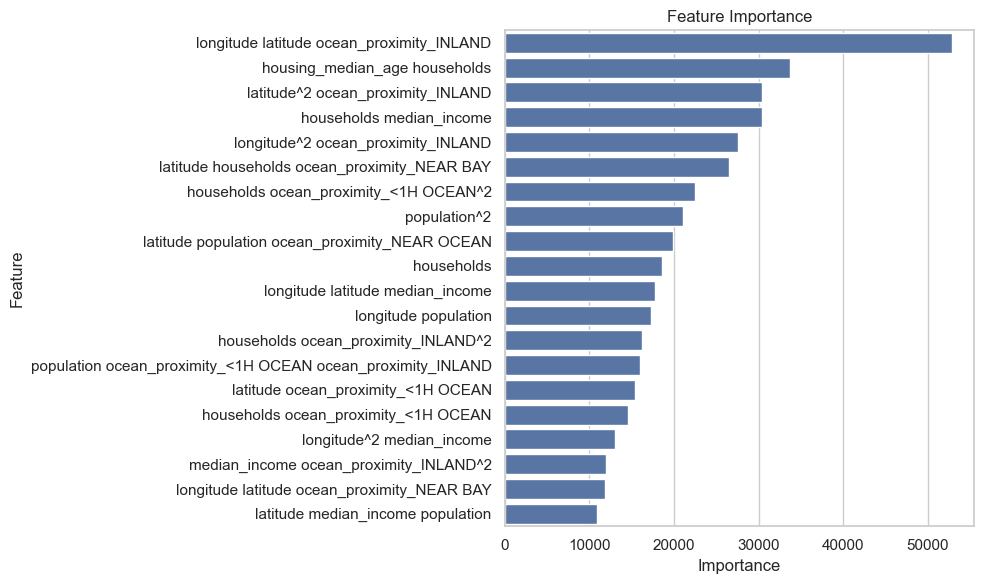

In [40]:
# 1. Feature Importance Plot (For Linear Regression coefficients)
# Get feature names after polynomial transformation
feature_names = poly.get_feature_names_out(X_train.columns)

feature_importance = pd.DataFrame({
    'Feature': feature_names,  # Use feature names from PolynomialFeatures
    'Importance': lr.coef_[0]  # Access the first element of coef_ for linear coefficients
})

# Sorting by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Select top 20 important features (or change the number as needed)
top_n = 20
feature_importance = feature_importance.head(top_n)


# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig(f"{output}/Feature Importance.jpg",format='jpg', dpi=300, bbox_inches='tight')
plt.show()





---

### 2. Residual Plot

A **residual plot** is used to check for any patterns in the residuals (the difference between actual and predicted values). If there are patterns, it suggests that the model hasn't fully captured the underlying relationship between the features and the target. Ideally, the residuals should be randomly distributed around zero.

1. **Calculate Residuals**:
   - The residuals are calculated by subtracting the predicted values from the actual target values.

```python
# Predict using polynomial features for train and test data
y_train_pred = lr.predict(X_train_poly)  # Changed X_train to X_train_poly
y_test_pred = lr.predict(X_test_poly)  # Changed X_test to X_test_poly

# Calculate residuals
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred
```

2. **Plotting Residuals**:
   - Use **Seaborn**'s `scatterplot` to plot the residuals against the predicted values. The **train residuals** will be plotted in blue, and **test residuals** will be plotted in red. A horizontal line at 0 is drawn to indicate no residual error.

```python
# Plotting residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred.flatten(), y=residuals_train.values.flatten(), color='blue', alpha=0.6, label='Train')  # Flattened arrays
sns.scatterplot(x=y_test_pred.flatten(), y=residuals_test.values.flatten(), color='red', alpha=0.6, label='Test')  # Flattened arrays
plt.axhline(0, linestyle='--', color='black')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.tight_layout()
plt.show()
```

---

### Explanation:
- **Residuals** are the differences between the actual and predicted target values, and a residual plot shows if there's any systematic pattern in those differences.
- The plot is used to verify if the model is appropriately fitting the data or if there are any trends left unaccounted for.
- Ideally, residuals should appear **randomly scattered** around the horizontal line at 0, indicating that the model has captured the relationship between the features and the target effectively.

---

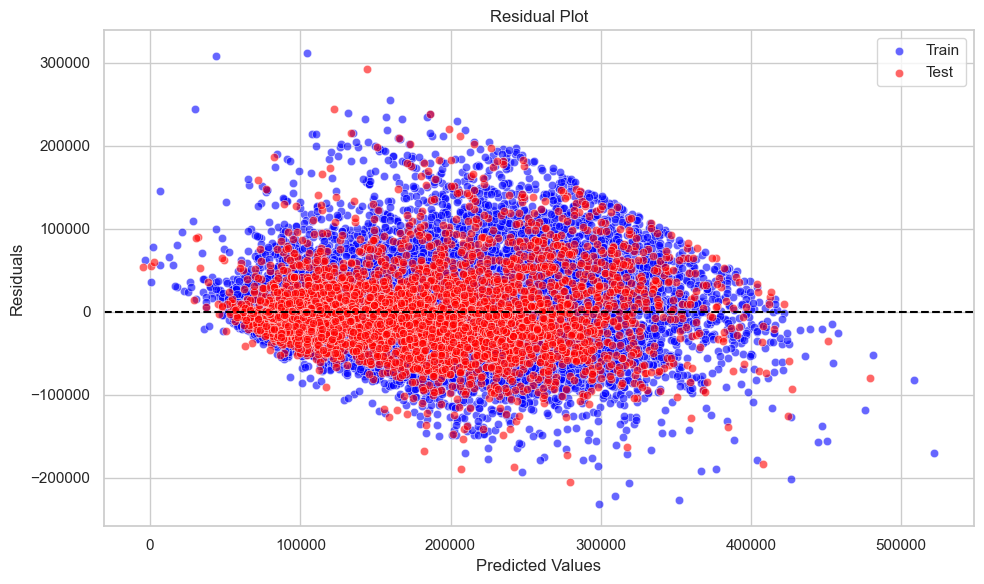

In [41]:
# 2. Residual Plot
# Calculate residuals
# Predict using polynomial features for train and test data
y_train_pred = lr.predict(X_train_poly)  # Changed X_train to X_train_poly
y_test_pred = lr.predict(X_test_poly)  # Changed X_test to X_test_poly

residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred.flatten(), y=residuals_train.values.flatten(), color='blue', alpha=0.6, label='Train')  # Flattened arrays
sns.scatterplot(x=y_test_pred.flatten(), y=residuals_test.values.flatten(), color='red', alpha=0.6, label='Test')  # Flattened arrays
plt.axhline(0, linestyle='--', color='black')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.tight_layout()
plt.savefig(f"{output}/Residual Plot.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()



# Prediction vs. Actual Plot
## Purpose:

A prediction vs. actual plot is a visual representation of the relationship between the actual values of a target variable and the predicted values generated by a machine learning model. This plot is essential for evaluating the model's performance and identifying potential issues or biases in its predictions.

## Key Elements:

**Scatter Plot:** The plot typically consists of a scatter plot where each point represents a data point. The x-axis represents the actual values, and the y-axis represents the predicted values.

**Diagonal Line:** A diagonal line is often drawn from the bottom left to the top right corner of the plot. This line represents the ideal scenario where the predicted values perfectly match the actual values.

**Data Points: **The distribution of data points around the diagonal line provides insights into the model's accuracy.

Interpreting the Plot:


**Points Close to the Line:** If the points are clustered tightly around the diagonal line, it indicates that the model's predictions are accurate.

**Points Far from the Line:** Points far from the line suggest that the model's predictions are inaccurate or biased.

**Patterns in the Data:** The distribution of points might reveal patterns, such as systematic underestimation or overestimation in certain regions.


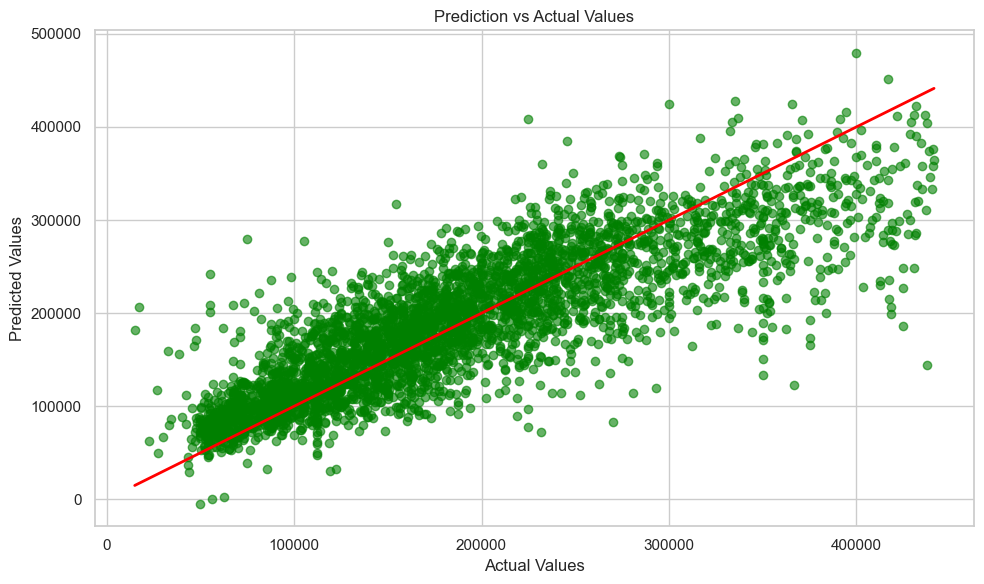

In [42]:
# 3. Prediction vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Prediction vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.savefig(f"{output}/Prediction vs Actual Values.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()



Conclusion

This project successfully implemented a linear regression model with polynomial features to predict California housing prices. The model demonstrated promising results with a Train R-squared of 0.6966 and a Test R-squared of 0.7006, indicating a good fit to the data. The model's performance was further evaluated using Mean Squared Error (MSE) of 2402131680.745 and Root Mean Squared Error (RMSE) of 49011.546, suggesting relatively accurate predictions. Overall, these results demonstrate the effectiveness of the implemented approach in this housing price prediction task.

This conclusion is brief, highlights the key metrics (R-squared, MSE, RMSE), and emphasizes the "good" overall performance.